Dr. Marques' Introduction to Data Science guest talk - Fall 2020

Step 1 - the initial notebook

This notebook is not wrong, but it's not a good notebook

---

In [4]:
import pandas as pd
salaries = pd.read_csv('data/salaries.csv')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

_(What are these cells trying to do? Why these values?)_

In [5]:
salaries = salaries[salaries.age < 66]
salaries = salaries[salaries.ed >= 12]

Now that the dataset is cleaned up, we need to check if both genders are similarly represented. A gender-skewed dataset is still useful for the analysis, but makes it more difficult.

In [6]:
print('The dataset has {} female and {} male samples'.format(
   len(salaries[salaries.sex == 'female']),
   len(salaries[salaries.sex == 'male'])))

The dataset has 576 female and 415 male samples


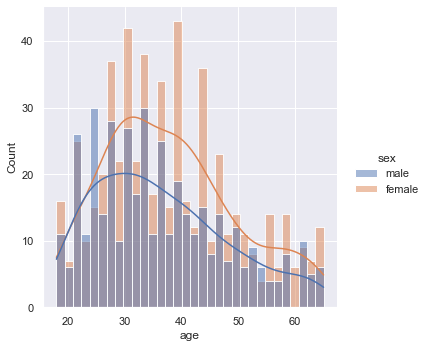

In [7]:
sns.displot(salaries, x='age',  hue='sex', bins='sqrt', kde=True)
# Add transparency
plt.show()

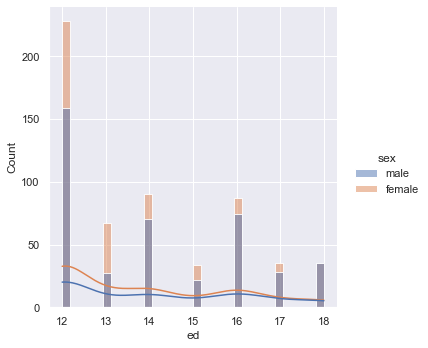

In [8]:
sns.displot(salaries, x='ed',  hue='sex', bins='sqrt', kde=True)
plt.show()

We will start with an overview of the relationships among the features (columns), split by sex.

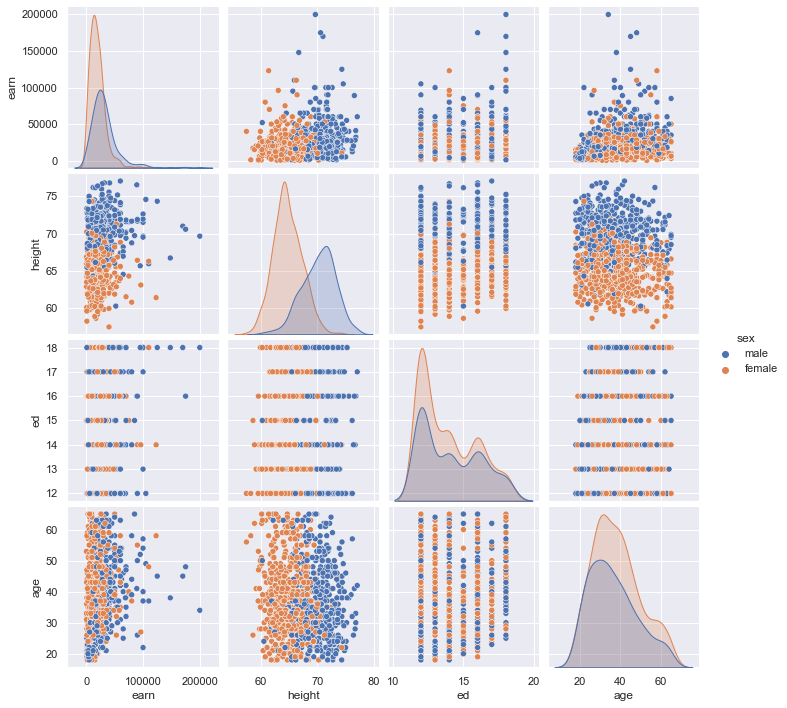

In [9]:
#sns.pairplot(salaries, hue='sex', plot_kws=dict(alpha=0.3));
sns.pairplot(salaries, hue='sex');

In [10]:
salaries.groupby(['sex', 'race']).size().unstack()

race,black,hispanic,other,white
sex,,,,
female,57,29,11,479
male,34,27,8,346


### Analyzing experience

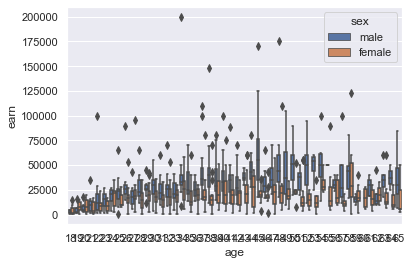

In [11]:
sns.boxplot(data=salaries, x='age', y='earn', hue='sex');

This plot shows that with the exception of the youngest age group, females earn less on average. More importantly, females earn less in all quartiles and have fewer outliers in the fourth quartile (the higher end of salaries).

### Analyzing education level

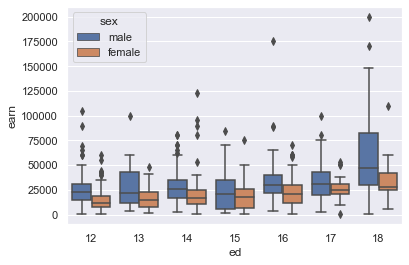

In [12]:
sns.boxplot(data=salaries, x='ed', y='earn', hue='sex');

This plot also shows that females earn less than males on average, and again the quartiles are lower for females.

### Excluding low salaries

In [13]:
salaries.earn.describe()

count       991.000000
mean      24323.319879
std       20334.095131
min         200.000000
25%       12000.000000
50%       20000.000000
75%       30000.000000
max      200000.000000
Name: earn, dtype: float64

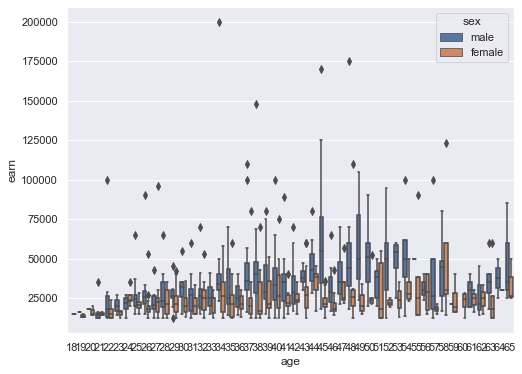

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(data=salaries[salaries.earn >= 12000], x='age', y='earn', hue='sex');

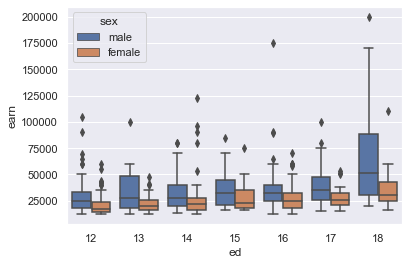

In [16]:
sns.boxplot(data=salaries[salaries.earn >= 12000], x='ed', y='earn', hue='sex');

After we exclude the lower salaries, we end up with the same picture: females are paid less on average and in general.

### Conclusions

We collected enough evidence to point to potential gender discrimination in salaries at this company:

- For the same experience level, females make less on average and in general (all quartiles).
- When adjusting for education as a possible explanation, the data also shows that females make less on average and in general for the same education level.